In [132]:
import cv2  # Import OpenCV, a library for computer vision and image processing
import os  # Import os, a module for interacting with the operating system (e.g., file and directory management)
import numpy as np  # Import numpy, a library for numerical computations with arrays
import pandas as pd  # Import pandas, a library for data manipulation and analysis


In [133]:
data = [] # Initialize an empty list to store the image data
labels = [] # Initialize an empty list to store the image labels

In [134]:
# Loop through all categories (subdirectories) in the "Data/Raw" directory
for category in os.listdir("Data/Raw"):
    # Loop through all image files in the current category directory
    for img in os.listdir(f"Data/Raw/{category}"):
        # Construct the full path to the image file
        img_path = os.path.join("Data/Raw", category, img)
        
        # Read the image from the specified path using OpenCV
        img_data = cv2.imread(img_path)
        
        # Check if the image was successfully loaded (i.e., img_data is not None)
        if img_data is not None:
            # If the image was successfully loaded, append it to the data list
            data.append(img_data)
            
            # Also append the current category to the labels list
            labels.append(category)
        else:
            # If the image failed to load, print a warning message with the image path
            print(f"Warning: Failed to read image '{img_path}'")


In [135]:
# Convert the data list to a NumPy array for efficient storage and operations
data = np.array(data)

# Convert the labels list to a NumPy array for efficient storage and operations
labels = np.array(labels)

# Print the shape of the data array to verify dimensions (number_of_images, image_height, image_width, number_of_channels)
print(data.shape)

# Print the shape of the labels array to verify it matches the number of images
print(labels.shape)

(966, 48, 108, 3)
(966,)


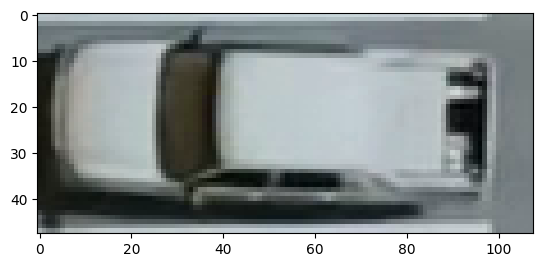

In [136]:
# Import the matplotlib.pyplot module for plotting and visualizing data
import matplotlib.pyplot as plt

# Display the first image in the data array using imshow
plt.imshow(data[0])


In [137]:
# Reshape the data array from 4D (num_samples, height, width, channels) to 2D (num_samples, height*width*channels)
# This flattens each image into a single row vector
data_flat = data.reshape(data.shape[0], -1)

# Print the shape of the flattened data array to check the dimensions
print(data_flat.shape)

# Print the shape of the labels array to check the dimensions
print(labels.shape)

(966, 15552)
(966,)


In [138]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to the labels array and transform the labels into numerical format
# This converts categorical labels into numerical labels
numerical_labels = label_encoder.fit_transform(labels)

# Display the transformed numerical labels
numerical_labels


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [139]:
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
onehot_encoder = OneHotEncoder()

# Reshape numerical_labels to a 2D array (required by OneHotEncoder)
# OneHotEncoder expects a 2D array with shape (n_samples, n_features)
numerical_labels_reshaped = numerical_labels.reshape(-1, 1)

# Fit the one-hot encoder to the reshaped numerical labels and transform them into one-hot encoded format
onehot_labels = onehot_encoder.fit_transform(numerical_labels_reshaped)

# Convert the sparse matrix output of OneHotEncoder to a dense array
onehot_labels = onehot_labels.toarray()


In [152]:
# Determine the number of classes based on the shape of the one-hot encoded labels
num_classes = onehot_labels.shape[1]

# Determine the number of neurons in the input layer based on the shape of the flattened data
input_neuron = data_flat.shape[1]


In [141]:
# Assign the flattened data array to X
X = data_flat

# Assign the one-hot encoded labels array to y
y = onehot_labels


In [142]:
# Importing the necessary functions for splitting the data and standardizing features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into training and testing sets using a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the StandardScaler
scaler = StandardScaler()

# Standardizing the features of the training set
X_train_scaled = scaler.fit_transform(X_train)

# Standardizing the features of the testing set
X_test_scaled = scaler.fit_transform(X_test)


In [143]:
# Importing necessary functions from Keras for building the ANN
from keras.models import Sequential  # Sequential model for stacking layers
from keras.layers import Dense       # Dense layer for fully connected neural network

# Initializing the Sequential model
model = Sequential()

# Adding the input layer with input_neuron(value) neurons, using ReLU activation function = 15552 neourons
model.add(Dense(128, input_shape=(input_neuron,), activation='relu'))

# Adding a hidden layer with 64 neurons, using ReLU activation function
model.add(Dense(64, activation='relu'))

# Adding another hidden layer with 32 neurons, using ReLU activation function
model.add(Dense(32, activation='relu'))

# Adding the output layer with num_classes neurons for classification, using softmax activation function = 2 neurons
model.add(Dense(num_classes, activation='softmax'))

# Compiling the model with the Adam optimizer, categorical crossentropy loss function, and accuracy as the metric
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Printing the summary of the model architecture
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               1990784   
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 2)                 66        
                                                                 
Total params: 2,001,186
Trainable params: 2,001,186
Non-trainable params: 0
_________________________________________________________________


In [144]:
# Training the model on the training data (X_train_scaled, y_train) for 50 epochs, with 20% of the data used for validation
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Evaluating the trained model on the test data (X_test_scaled, y_test) to get the loss and accuracy
model.evaluate(X_test_scaled, y_test)


Epoch 1/50
20/20 [==============================] - 1s 37ms/step - loss: 0.1041 - accuracy: 0.9546 - val_loss: 0.1490 - val_accuracy: 0.9742
Epoch 2/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0460 - accuracy: 0.9951 - val_loss: 0.1235 - val_accuracy: 0.9871
Epoch 3/50
20/20 [==============================] - 0s 18ms/step - loss: 0.0212 - accuracy: 0.9968 - val_loss: 0.1405 - val_accuracy: 0.9871
Epoch 4/50
20/20 [==============================] - 0s 17ms/step - loss: 0.0329 - accuracy: 0.9951 - val_loss: 0.1481 - val_accuracy: 0.9871
Epoch 5/50
20/20 [==============================] - 0s 15ms/step - loss: 0.0473 - accuracy: 0.9984 - val_loss: 0.1727 - val_accuracy: 0.9806
Epoch 6/50
20/20 [==============================] - 0s 16ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.1875 - val_accuracy: 0.9871
Epoch 7/50
20/20 [==============================] - 0s 19ms/step - loss: 1.5223e-06 - accuracy: 1.0000 - val_loss: 0.1907 - val_accuracy: 0.9871
Epoch 8/5

[3.130858385702595e-05, 1.0]

In [145]:
y_pred = model.predict(X_test_scaled[:11]) # predict the X_test_scaled[:11] images
# [Parked , Vacant] = [0, 1] 

1/1 [==============================] - 0s 75ms/step


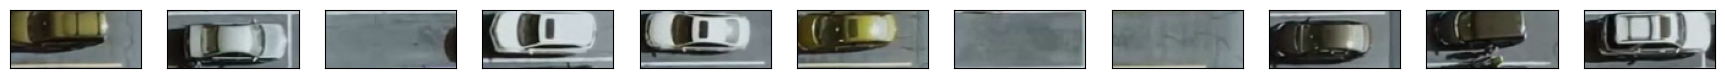

In [146]:
import matplotlib.pyplot as plt  # Importing the pyplot module from matplotlib, commonly aliased as plt

n = 11  # Defining the number of images to display
image_shape = data[0].shape  # Assuming that the images are stored in `data` and getting the shape of the first image

plt.figure(figsize=(2 * n, 2))  # Creating a new figure with a specified size, adjusting width and height for better visualization

for i in range(n):  # Iterating over each image index up to `n`
    ax = plt.subplot(1, n, i + 1)  # Creating a subplot within the figure, positioned at (1, n), and incrementing by 1
    plt.imshow(X_test[i].reshape(image_shape), cmap='gray')  # Displaying the i-th image from `X_test` after reshaping to its original shape, using a grayscale colormap
    plt.gray()  # Setting the colormap to grayscale
    ax.get_xaxis().set_visible(False)  # Hiding the x-axis ticks and labels
    ax.get_yaxis().set_visible(False)  # Hiding the y-axis ticks and labels

plt.show()  # Displaying the plot


In [147]:
# Predicted Output

for i in y_pred:  # Iterating over each prediction in `y_pred`
    argmax = np.argmax(i)  # Finding the index of the maximum value in the prediction array
    if argmax == 0:  # Checking if the maximum value index corresponds to class 0
        print("Parked")  # Printing "Parked" if class 0 has the highest probability
    elif argmax == 1:  # Checking if the maximum value index corresponds to class 1
        print("Vacant")  # Printing "Vacant" if class 1 has the highest probability


Parked
Parked
Vacant
Parked
Parked
Parked
Vacant
Vacant
Parked
Parked
Parked


In [150]:
# Expected output
counter = 0  # Counter to limit the number of outputs to 11

for i in y_test:  # Iterating over each true label in `y_test`
    argmax = np.argmax(i)  # Finding the index of the maximum value in the true label array
    if counter == 11:  # Checking if the counter reaches 11 to stop the loop
        break
    elif argmax == 0:  # Checking if the maximum value index corresponds to class 0
        print("Parked")  # Printing "Parked" if class 0 is the true label
    elif argmax == 1:  # Checking if the maximum value index corresponds to class 1
        print("Vacant")  # Printing "Vacant" if class 1 is the true label
    counter += 1  # Incrementing the counter to limit the number of outputs


Parked
Parked
Vacant
Parked
Parked
Parked
Vacant
Vacant
Parked
Parked
Parked
